
# Project: Pre-Analyze for Diabetes Prediction
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>

</ul>

<a id='intro'></a>
## Introduction

> ### Overview
>
> Diabetes is a chronic, metabolic disease characterized by elevated levels of blood glucose (or blood sugar), which leads over time to serious damage to the heart, blood vessels, eyes, kidneys and nerves. (WHO)
>
> The detecting diabetes beforehand prevents permanent damage to the body that occurs with possible coma.In this sense, before the predict of diabetes, I will analyze data that are taken from around 1000 people in India and this data include several columns which are glucose, blood pressure etc.

### Meanings for Columns
>This datasets consist of eight medical predictor (independent) variables and one target (dependent) variable, Outcome Class variable whether paitent has diabetes or not (encoded as 0 or 1). Predictor variables are includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

>Pregnancies - Number of times Pregnant.
>
>Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
>
>BloodPressure - Diastolic blood pressure (mm Hg).
>
>SkinThickness - Triceps skin fold thickness (mm).
>
>Insulin - 2-Hour serum insulin (mu U/ml).
>
>BMI - Body mass index ( BMI weight in kg/(height in m)^2).
>
>DiabetesPedigreeFunction - Diabetes pedigree function.
>
>Age - Age in year.
>
>Outcome - 1 if Patient has diabetes, 0 otherwise.

### Which questions will I find answers in the Exploratory Data Analysis section?

> 1) What is the correlations between outcome and all other parameters?
>
> 2) What is the rate of diabetes and non-diabetes?
>
> 3) What is the amount of sugar in the blood in patients with a high body mass index?
>
> 4) What is the rate of diabetes in people who are pregnant and those who are not?
>
> 5) What is the difference between the average amount of insulin in a person with multiple pregnancies and the amount of insulin in a single pregnancy ?
>
> 6) Some Visualisation and Statistical Information that Required



<a id='wrangling'></a>
## Data Wrangling

> After uploading the data, I will perform the clearing, deleting, editing and explore operations in this section in order to get it ready for analysis. Therefore, I need some important libraries which are has been imported at below.




In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [123]:
# Load data
df = pd.read_csv(r"C:\Users\yemre\Downloads\diabetes.csv")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [124]:
#Check data type
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [125]:
#As we can see there is nor missing rows and non-null.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [126]:
#The dimensions of the dataset
df.shape

(768, 9)

In [127]:
# check for duplicates in the data
sum(df.duplicated())

0

> ### Obsevations from the data set
>
> Our data looks very clean and tidy. However as we can see at df.head() that some cells contain 0, in this case it does not make sense and I will replace 0 value by Nan. 




In [128]:
# This columns should change by Nan.

zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']
df[zero] = df[zero].replace(0,np.NaN)

In [129]:
# let's look missing value
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [130]:
# I will drop some values and I will fill other values

df['Glucose'].fillna(value=df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(value=df['BloodPressure'].mean(), inplace=True)
df['BMI'].fillna(value=df['BMI'].mean(), inplace=True)
df['SkinThickness'].fillna(value=df['SkinThickness'].mean(), inplace=True)


In [131]:
df.dropna(inplace = True)

In [132]:
#Check the null values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [133]:
# Check the shape of data again 
df.shape

(394, 9)

<a id='eda'></a>
## Exploratory Data Analysis

> 
> Now our data is clean and ready to analyze !

### Question 1: What is the correlations between outcome and all other parameters?

In [134]:
corr_martx = df.corr()
corr_martx["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.515362
Age                         0.352982
Insulin                     0.303454
BMI                         0.271103
Pregnancies                 0.258846
SkinThickness               0.257854
DiabetesPedigreeFunction    0.200759
BloodPressure               0.192819
Name: Outcome, dtype: float64

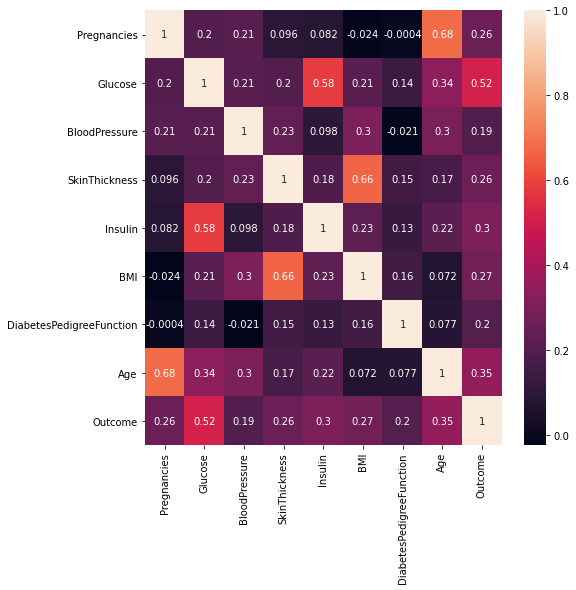

In [135]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_martx, annot=True);


### Question 2: What is the rate of diabetes and non-diabetes?

Dibates is % 32.99492385786802
Non_Dibates is % 67.00507614213198


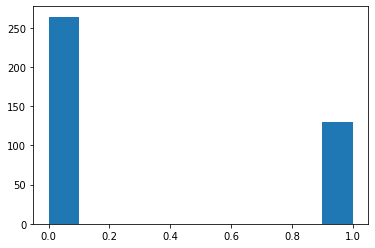

In [178]:
plt.hist(df['Outcome'])
diabetes = len(df.loc[df["Outcome"]==1])
non_diabetes = len(df.loc[df["Outcome"]==0])
outcome = len(df["Outcome"])

rate_diabetes = (diabetes/outcome)*100
rate_non_diabetes = (non_diabetes/outcome)*100
print("Dibates is % "+ str(rate_diabetes) )
print("Non_Dibates is % "+ str(rate_non_diabetes) )

### Question 3 : What is the average amount of sugar in the blood in patients with a high body mass index?

> If your BMI is:

>below 18.5 – you're in the underweight range
>
>between 18.5 and 24.9 – you're in the healthy weight range
>
>between 25 and 29.9 – you're in the overweight range
>
>between 30 and 39.9 – you're in the obese range

In [137]:
# Let's find our answer

bmi = df.loc[df['BMI']>25]

bmi["Glucose"].mean()

# As we can see at the bottom normal women shold have between 72 and 99 mm Hg but it is over the normal range.

124.84967460568535

### Question 4: What is the rate of diabetes in people who are pregnant and who are not?

Diabet with pregnant: 111
Diabet with non-pregnant: 111


<BarContainer object of 2 artists>

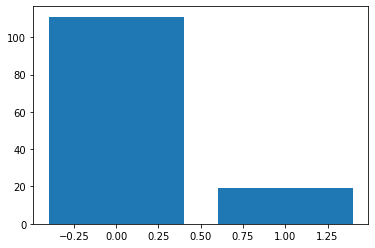

In [183]:
pregnant = len( df.loc[(df["Outcome"]==1) & (df["Pregnancies"]> 0)])
non_pregnant = len(df.loc[(df["Outcome"]==1) & (df["Pregnancies"]==0)])
list_to = [pregnant, non_pregnant]
print("Diabet with pregnant: " + str(pregnant))
print("Diabet with non-pregnant: " + str(pregnant))
plt.bar(range(2),list_to)



### Question 5:  What is the difference between the average amount of insulin in a person with multiple pregnancies and the amount of insulin in a single pregnancy ?

In [139]:
insulin_1 = df.loc[df["Pregnancies"]== 1] 
insulin_2 = df.loc[df["Pregnancies"]>1] 
print("Sigle Pregnancy average amount of insulin = " + str(insulin_1["Insulin"].mean()))
print("Multiple Pregnancy average amount of insulin = " + str(insulin_2["Insulin"].mean()))

Sigle Pregnancy average amount of insulin = 141.7127659574468
Multiple Pregnancy average amount of insulin = 160.0781893004115


### 6: Some Visualisation and Statistical Information that Required

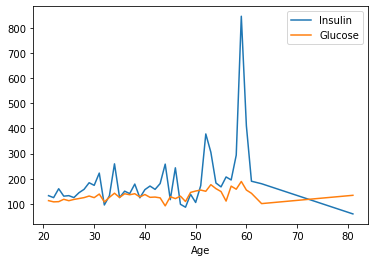

In [140]:
df.groupby(["Age"])[["Insulin", "Glucose"]].mean().plot()

#### Our data looks like

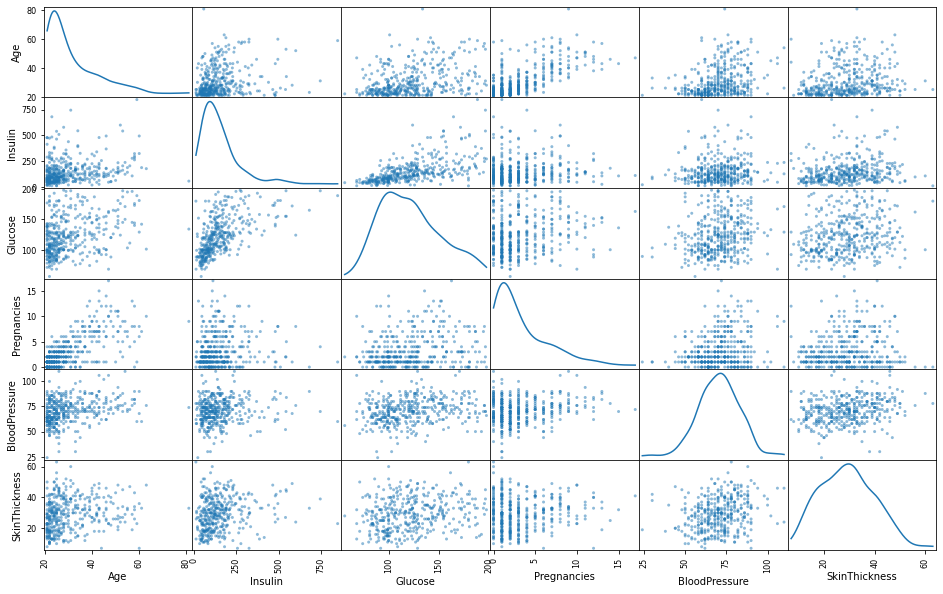

In [142]:
pd.plotting.scatter_matrix(df[['Age', 'Insulin', 'Glucose', 
                                   'Pregnancies', 'BloodPressure', 'SkinThickness'
                                   ]].dropna(), 
                           figsize=(16, 10), diagonal='kde')
plt.show()

In [143]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.613418,70.654822,29.106599,155.548223,33.070958,0.525543,30.814721,0.329949
std,3.209635,30.783073,12.469919,10.504273,118.775855,7.015073,0.350127,10.198971,0.470792
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.400000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.075000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Let's Look at Outliers

In [181]:
# I wuill look at for all column's outliers
# A point beyond an inner fence on either side is considered a mild outlier.
# A point beyond an outer fence is considered an extreme outlier. 8,675 26,025 63,1
def outlier (column):
    Q1 = np.quantile(column, .25)
    Q3 = np.quantile(column, .75)
    IQR = Q3 -Q1
    lower_inner_fence = Q1 - 1.5*IQR
    upper_inner_fence = Q3 + 1.5*IQR
    lower_outer_fence = Q1 - 3*IQR
    upper_outer_fence = Q3 + 3*IQR

    
    for i in column :
        if i <= lower_inner_fence and i>= lower_outer_fence:
            print("Mild Outlier : "+ str(i))
        if i>=upper_inner_fence and i<=upper_outer_fence:
            print("Mild Outlier : "+str(i) )
        if i<=lower_outer_fence or i>=upper_outer_fence:
            print("Extreme Outlier : "+str(i))
            
print("----------------Pregnancies_Outliers---------------------")    
outlier(df["Pregnancies"])
print("----------------Glucose_Outliers---------------------")    
outlier(df["Glucose"])
print("----------------BloodPressure_Outliers---------------------")    
outlier(df["BloodPressure"])
print("----------------SkinThickness_Outliers---------------------")    
outlier(df["SkinThickness"])
print("----------------Insulin_Outliers---------------------")    
outlier(df["Insulin"])
print("----------------BMI_Outliers---------------------")    
outlier(df["BMI"])
print("----------------Age_Outliers---------------------")    
outlier(df["Age"])
# I will calculate all inner and outer fence that we will understand out outlier is extreme or mild.

----------------Pregnancies_Outliers---------------------
Mild Outlier : 11
Mild Outlier : 13
Mild Outlier : 15
Mild Outlier : 17
Extreme Outlier : 17
Mild Outlier : 12
Mild Outlier : 12
Mild Outlier : 11
Mild Outlier : 14
Mild Outlier : 13
Mild Outlier : 12
Mild Outlier : 12
Mild Outlier : 11
Mild Outlier : 11
Mild Outlier : 11
Mild Outlier : 13
Mild Outlier : 12
----------------Glucose_Outliers---------------------
----------------BloodPressure_Outliers---------------------
Mild Outlier : 30.0
Mild Outlier : 110.0
Mild Outlier : 30.0
Mild Outlier : 110.0
Mild Outlier : 102.0
Mild Outlier : 24.0
Mild Outlier : 38.0
Mild Outlier : 106.0
Mild Outlier : 106.0
----------------SkinThickness_Outliers---------------------
Mild Outlier : 63.0
----------------Insulin_Outliers---------------------
Extreme Outlier : 543.0
Extreme Outlier : 846.0
Mild Outlier : 495.0
Mild Outlier : 485.0
Mild Outlier : 495.0
Mild Outlier : 478.0
Extreme Outlier : 744.0
Mild Outlier : 370.0
Extreme Outlier : 680.0

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

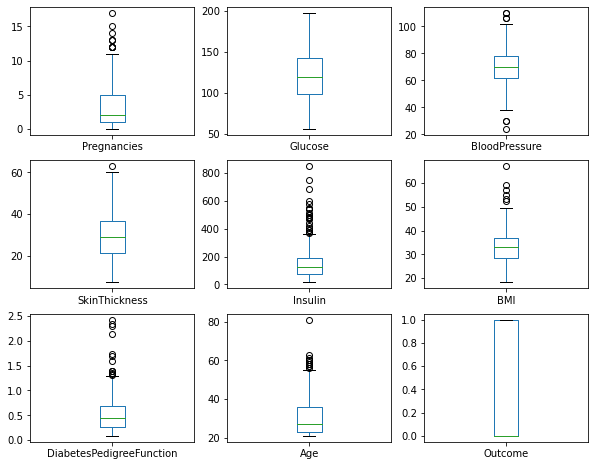

In [164]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

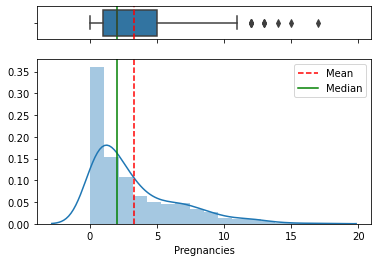

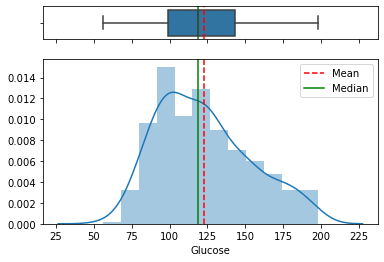

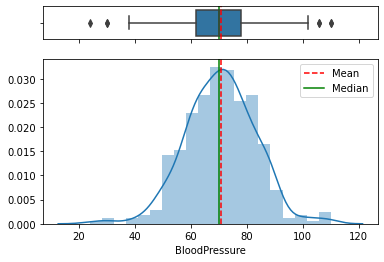

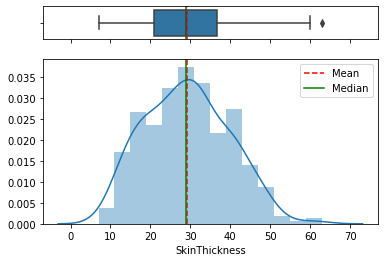

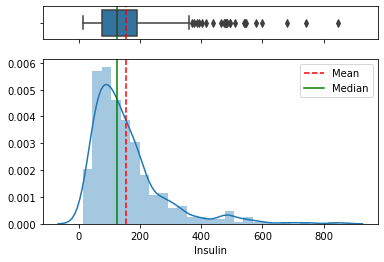

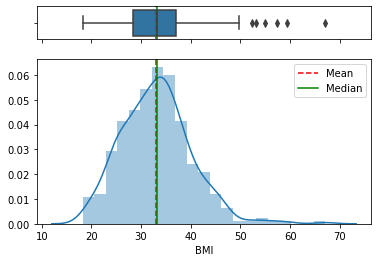

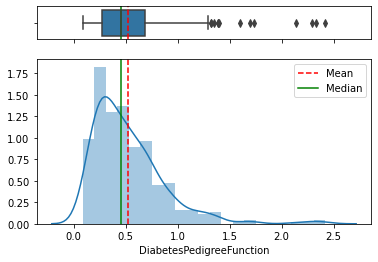

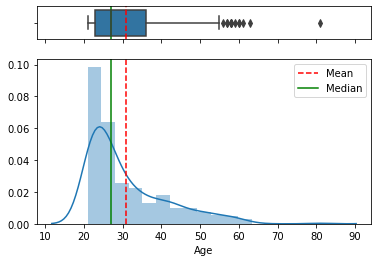

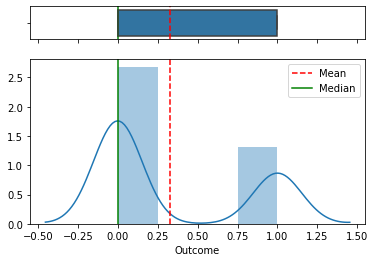

In [177]:
for column in df:
    f, (ax_box, ax_hist) = plt.subplots(2,  sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
    mean=df[column].mean()
    median=df[column].median()


    sns.boxplot(df[column], ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')


    sns.distplot(df[column], ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')


    plt.legend({'Mean':mean,'Median':median})

    ax_box.set(xlabel='')
    plt.show()

In [ ]:
# With this visualization we can compare our Mean and Median.

#### Now next step I will pass Prediction section. I am working on it . I will do later.